In [ ]:
!pip install -q xgboost
!pip install -q catboost

In [ ]:
# Core Python & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn: preprocessing, model selection, evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Scikit-learn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Gradient boosting classifiers
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# For saving the model
import pickle

# Style for plots
sns.set(style="whitegrid")


In [ ]:
%matplotlib inline

In [ ]:
# Load the dataset
df = pd.read_csv("students_adaptability_level_online_education.csv")

# Show first 5 rows
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [ ]:
# Overview of dataset structure
df.info()

# Summary statistics
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [ ]:
# Check for any missing values in each column
df.isnull().sum()

# Optional: See how many total nulls
print(f"Total missing values: {df.isnull().sum().sum()}")

Total missing values: 0


In [ ]:
# Drop rows with any null values (There are no null values present in this case)
df.dropna(inplace=True)

# Confirm removal
df.isnull().sum()

,0
Gender,0
Age,0
Education Level,0
Institution Type,0
IT Student,0
Location,0
Load-shedding,0
Financial Condition,0
Internet Type,0
Network Type,0


In [ ]:
# Checking for outliers
for col in df.columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for Gender:
Gender
Boy     663
Girl    542
Name: count, dtype: int64

Value counts for Age:
Age
21-25    374
11-15    353
16-20    278
1-5       81
26-30     68
6-10      51
Name: count, dtype: int64

Value counts for Education Level:
Education Level
School        530
University    456
College       219
Name: count, dtype: int64

Value counts for Institution Type:
Institution Type
Non Government    823
Government        382
Name: count, dtype: int64

Value counts for IT Student:
IT Student
No     901
Yes    304
Name: count, dtype: int64

Value counts for Location:
Location
Yes    935
No     270
Name: count, dtype: int64

Value counts for Load-shedding:
Load-shedding
Low     1004
High     201
Name: count, dtype: int64

Value counts for Financial Condition:
Financial Condition
Mid     878
Poor    242
Rich     85
Name: count, dtype: int64

Value counts for Internet Type:
Internet Type
Mobile Data    695
Wifi           510
Name: count, dtype: int64

Value counts for Network T

In [ ]:
# As most variables are object dtypes , we use label encoding to make it possible to detect outliers
from sklearn.preprocessing import LabelEncoder

# Make a copy of the original dataframe to preserve it
df_encoded = df.copy()

# Preview original data (first 5 rows)
print("Original (Categorical) Data Sample:\n")
display(df.head())

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to all columns (categorical)
for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Preview encoded data
print("\nEncoded (Numeric) Data Sample:\n")
display(df_encoded.head())


Original (Categorical) Data Sample:



,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low



Encoded (Numeric) Data Sample:



,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1


/tmp/ipython-input-134-2264001609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


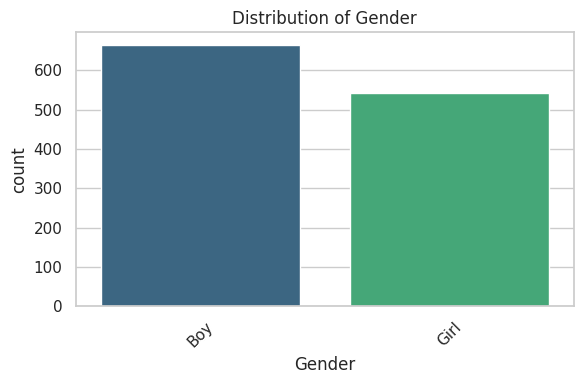

/tmp/ipython-input-134-2264001609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


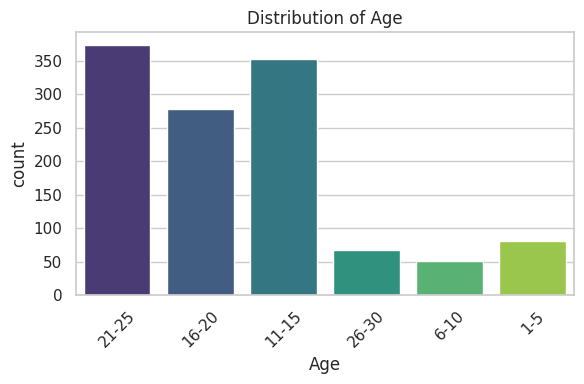

/tmp/ipython-input-134-2264001609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


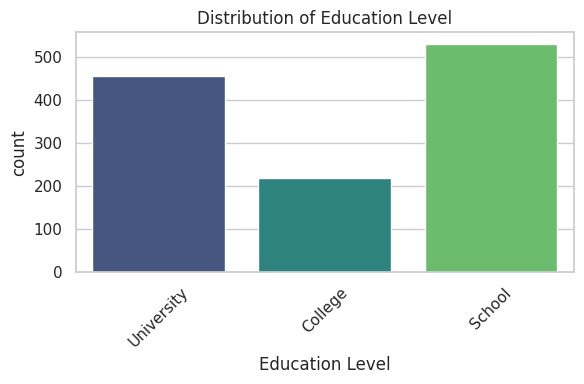

/tmp/ipython-input-134-2264001609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


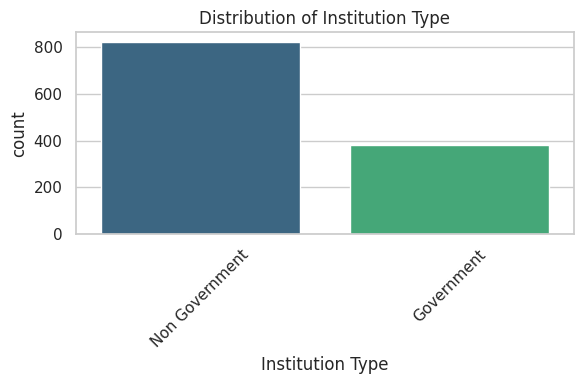

/tmp/ipython-input-134-2264001609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


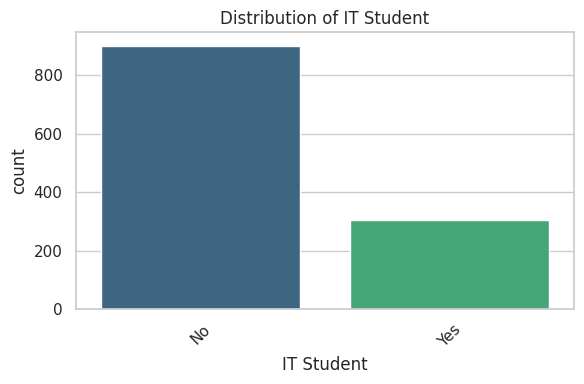

/tmp/ipython-input-134-2264001609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


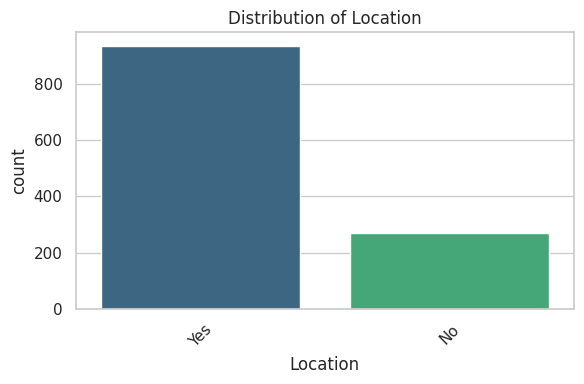

/tmp/ipython-input-134-2264001609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


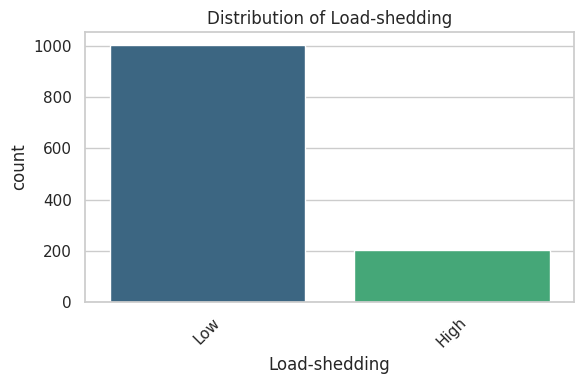

/tmp/ipython-input-134-2264001609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


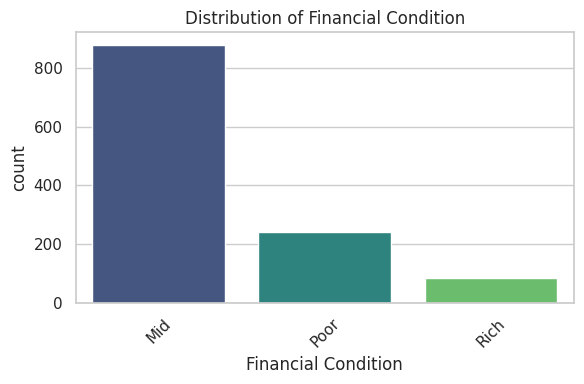

/tmp/ipython-input-134-2264001609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


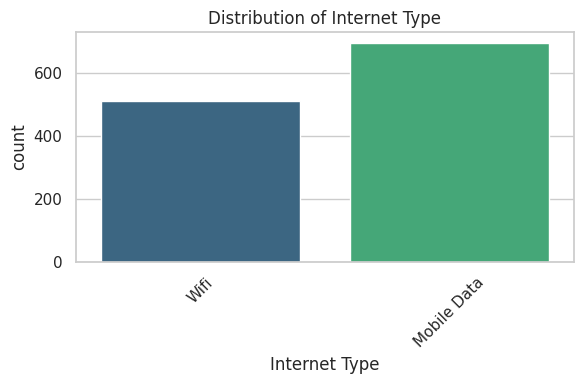

/tmp/ipython-input-134-2264001609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


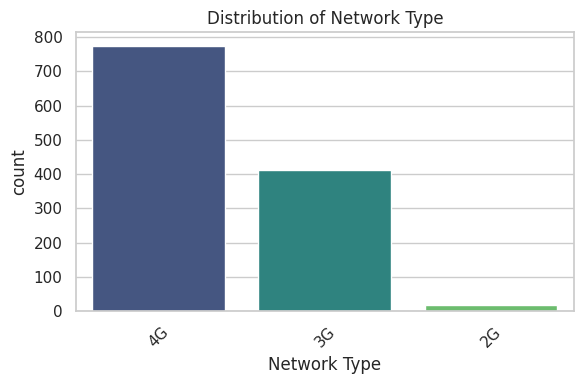

/tmp/ipython-input-134-2264001609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


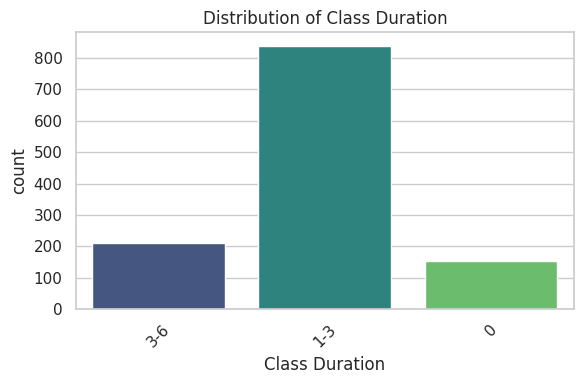

/tmp/ipython-input-134-2264001609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


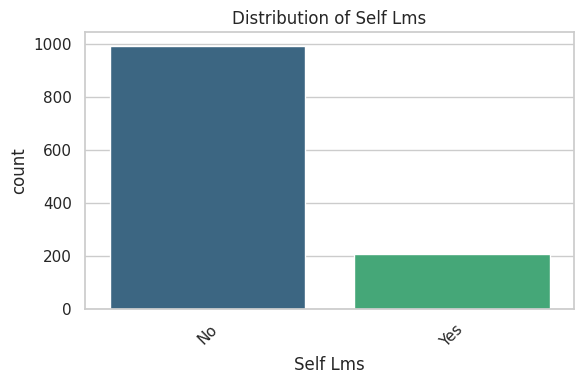

/tmp/ipython-input-134-2264001609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


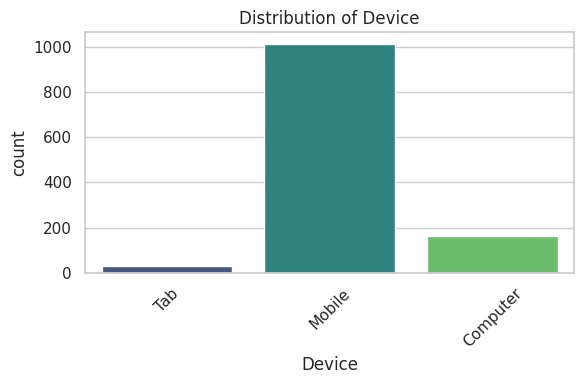

/tmp/ipython-input-134-2264001609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


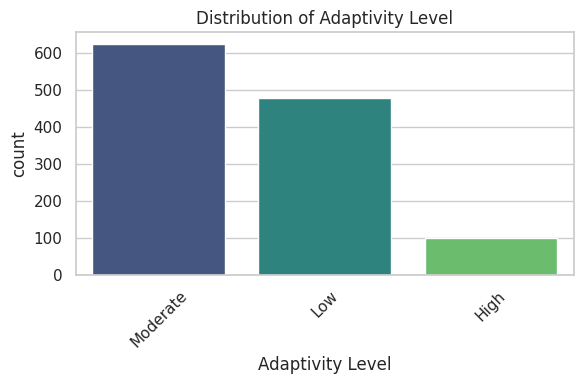

In [ ]:
# Loop through each categorical column in the DataFrame and plot a countplot
# to visualize the frequency distribution of each category.
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-135-3084113676.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Adaptivity Level', data=df, palette='viridis')


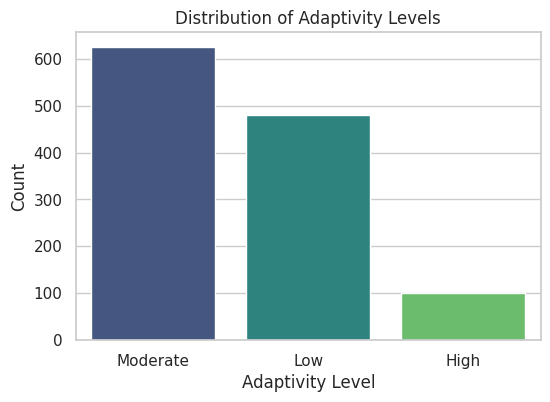

In [ ]:
# Count of each adaptability level
plt.figure(figsize=(6,4))
sns.countplot(x='Adaptivity Level', data=df, palette='viridis')
plt.title('Distribution of Adaptivity Levels')
plt.xlabel('Adaptivity Level')
plt.ylabel('Count')
plt.show()

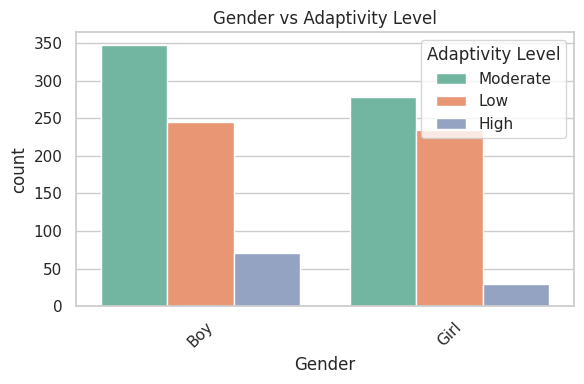

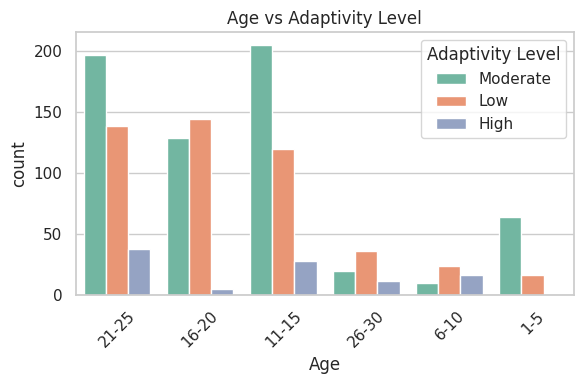

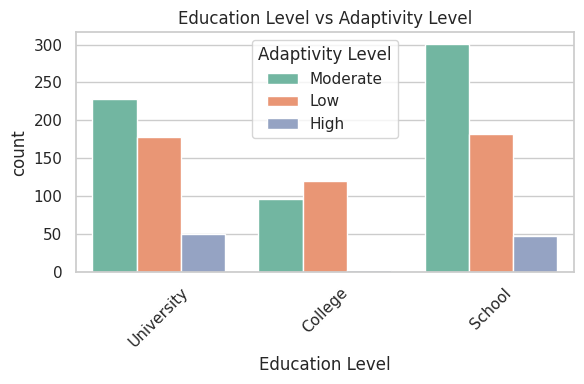

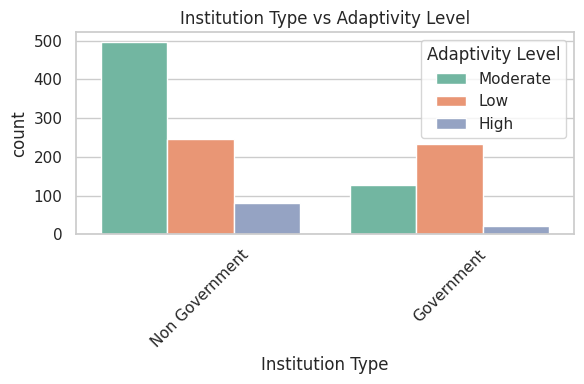

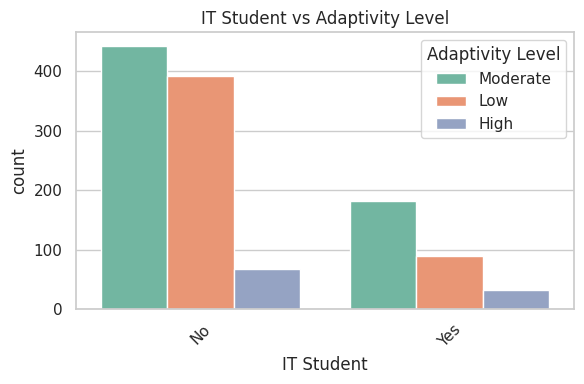

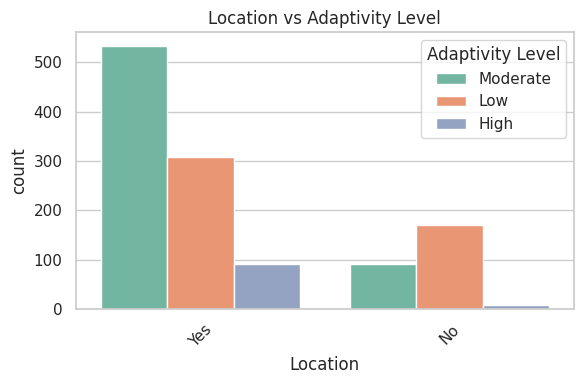

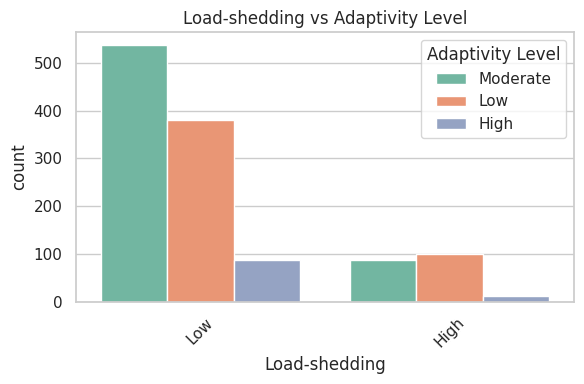

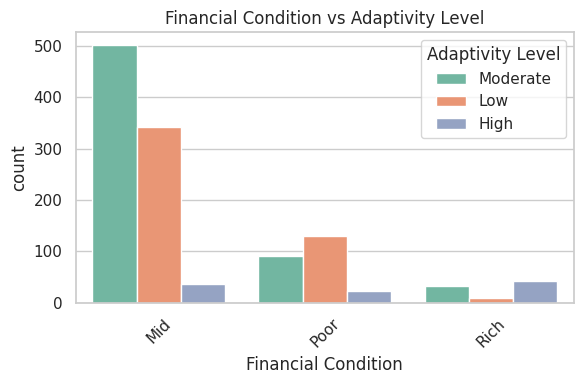

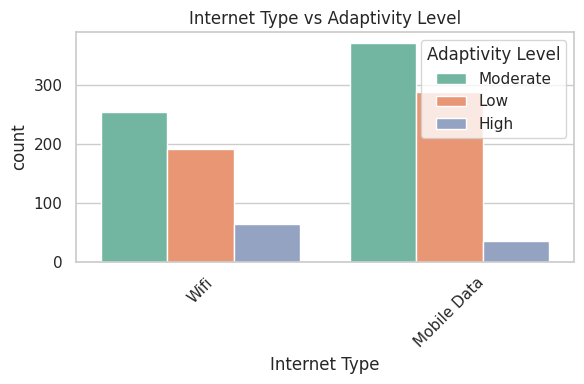

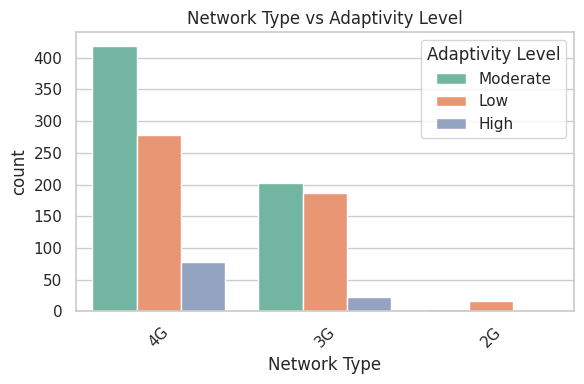

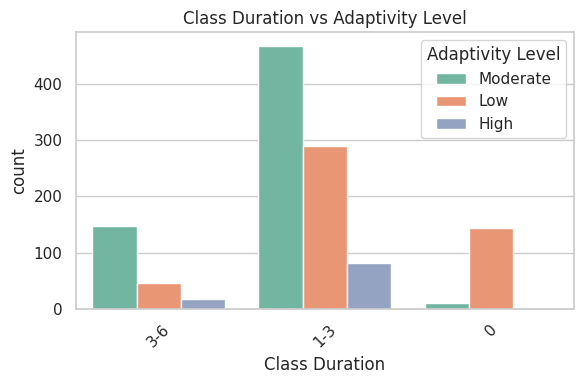

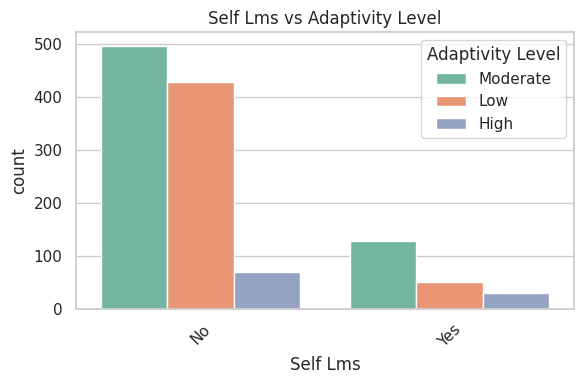

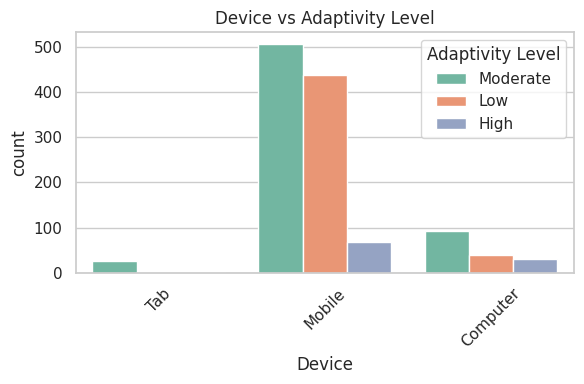

In [ ]:
# Identify categorical columns (excluding the target column)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Adaptivity Level']

# Bivariate barplots for each categorical column vs target
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Adaptivity Level', data=df, palette='Set2')
    plt.title(f'{col} vs Adaptivity Level')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

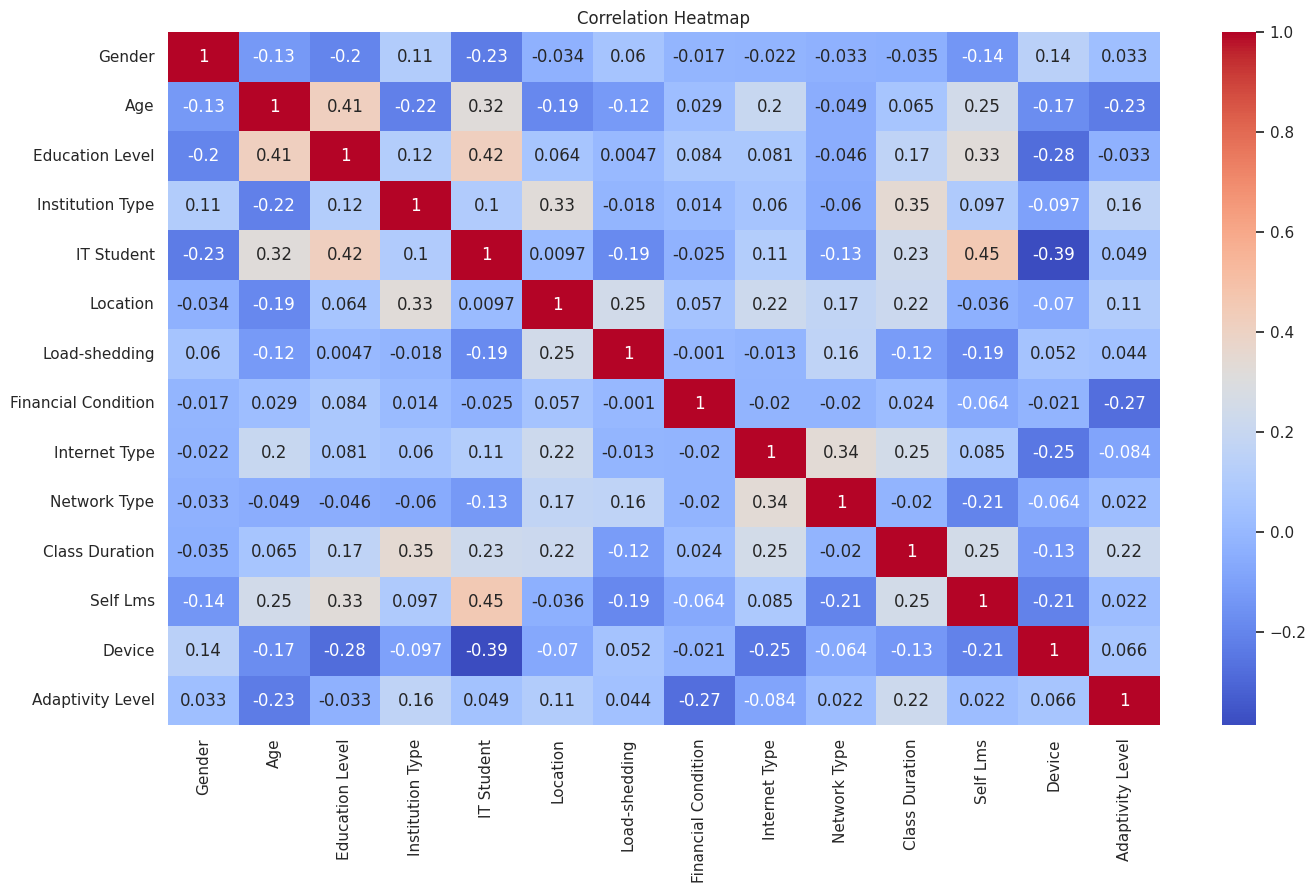

In [ ]:
# Correlation heatmap using encoded dataset
numerical_cols = df_encoded.select_dtypes(include=np.number)

if not numerical_cols.empty:
    plt.figure(figsize=(16,9))
    sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()


In [ ]:
# Features and Target
X = df_encoded.drop("Adaptivity Level", axis=1)
y = df_encoded["Adaptivity Level"]

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print("Random Forest Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Macro F1 Score:", f1_score(y_test, y_pred_rfc, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rfc))
print("Classification Report:\n", classification_report(y_test, y_pred_rfc))
print("-"*50)

Random Forest Classifier Results
Accuracy: 0.9087136929460581
Macro F1 Score: 0.877725646988427
Confusion Matrix:
 [[ 14   2   4]
 [  0  88   8]
 [  1   7 117]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.70      0.80        20
           1       0.91      0.92      0.91        96
           2       0.91      0.94      0.92       125

    accuracy                           0.91       241
   macro avg       0.92      0.85      0.88       241
weighted avg       0.91      0.91      0.91       241

--------------------------------------------------


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Macro F1 Score:", f1_score(y_test, y_pred_logreg, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("-"*50)

Logistic Regression Results
Accuracy: 0.7136929460580913
Macro F1 Score: 0.6673800606384876
Confusion Matrix:
 [[ 10   6   4]
 [  0  60  36]
 [  5  18 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57        20
           1       0.71      0.62      0.67        96
           2       0.72      0.82      0.76       125

    accuracy                           0.71       241
   macro avg       0.70      0.65      0.67       241
weighted avg       0.71      0.71      0.71       241

--------------------------------------------------


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Macro F1 Score:", f1_score(y_test, y_pred_knn, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("-"*50)

KNN Classifier Results
Accuracy: 0.7676348547717843
Macro F1 Score: 0.6977772670003745
Confusion Matrix:
 [[10  2  8]
 [ 1 76 19]
 [ 8 18 99]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.50      0.51        20
           1       0.79      0.79      0.79        96
           2       0.79      0.79      0.79       125

    accuracy                           0.77       241
   macro avg       0.70      0.69      0.70       241
weighted avg       0.77      0.77      0.77       241

--------------------------------------------------


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', verbosity=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Macro F1 Score:", f1_score(y_test, y_pred_xgb, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("-"*50)


XGBoost Classifier Results
Accuracy: 0.91701244813278
Macro F1 Score: 0.8931435117002128
Confusion Matrix:
 [[ 15   2   3]
 [  0  89   7]
 [  1   7 117]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.75      0.83        20
           1       0.91      0.93      0.92        96
           2       0.92      0.94      0.93       125

    accuracy                           0.92       241
   macro avg       0.92      0.87      0.89       241
weighted avg       0.92      0.92      0.92       241

--------------------------------------------------


In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(verbose=0)
cat.fit(X_train, y_train)

with open('catboost_model.pkl', 'wb') as f:
    pickle.dump(cat, f)

y_pred_cat = cat.predict(X_test)

print("CatBoost Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print("Macro F1 Score:", f1_score(y_test, y_pred_cat, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))
print("Classification Report:\n", classification_report(y_test, y_pred_cat))
print("-"*50)


CatBoost Classifier Results
Accuracy: 0.91701244813278
Macro F1 Score: 0.8931435117002128
Confusion Matrix:
 [[ 15   2   3]
 [  0  89   7]
 [  1   7 117]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.75      0.83        20
           1       0.91      0.93      0.92        96
           2       0.92      0.94      0.93       125

    accuracy                           0.92       241
   macro avg       0.92      0.87      0.89       241
weighted avg       0.92      0.92      0.92       241

--------------------------------------------------


In [ ]:
from sklearn.model_selection import cross_val_score

# Store mean F1 scores
cv_f1_scores = {}

# Random Forest (no scaling needed)
rfc = RandomForestClassifier(random_state=42)
cv_f1_scores['Random Forest'] = cross_val_score(rfc, X_train, y_train, cv=5, scoring='f1_macro').mean()

# Logistic Regression (scaled)
logreg = LogisticRegression(max_iter=200)
cv_f1_scores['Logistic Regression'] = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='f1_macro').mean()

# KNN (scaled)
knn = KNeighborsClassifier()
cv_f1_scores['KNN'] = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='f1_macro').mean()

# XGBoost (no scaling needed)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', verbosity=0)
cv_f1_scores['XGBoost'] = cross_val_score(xgb, X_train, y_train, cv=5, scoring='f1_macro').mean()

# CatBoost (no scaling needed)
cat = CatBoostClassifier(verbose=0)
cv_f1_scores['CatBoost'] = cross_val_score(cat, X_train, y_train, cv=5, scoring='f1_macro').mean()

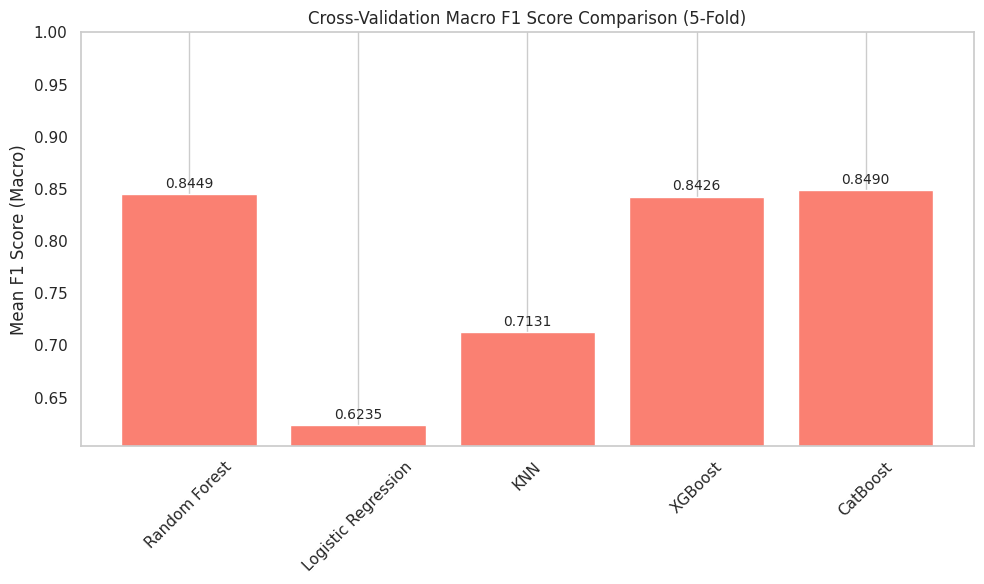

In [ ]:
# Plot the results of comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(cv_f1_scores.keys(), cv_f1_scores.values(), color='salmon')

# Add value labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.003, f"{height:.4f}",
             ha='center', va='bottom', fontsize=10)

plt.title('Cross-Validation Macro F1 Score Comparison (5-Fold)')
plt.ylabel('Mean F1 Score (Macro)')
plt.ylim(min(cv_f1_scores.values()) - 0.02, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Load the model
with open("catboost_model.pkl", "rb") as f:
    model = pickle.load(f)

# Load original data for reference to build encoders
df = pd.read_csv("students_adaptability_level_online_education.csv")

# Identify object columns for encoding (excluding the target if present in df)
object_cols_df = df.select_dtypes(include=['object']).columns.tolist()
# Exclude the target column from encoding columns if it exists in df
if 'Adaptivity Level' in object_cols_df:
    object_cols_df.remove('Adaptivity Level')

# Build a label encoder for each object column in the original data
encoders = {}
for col in object_cols_df:
    le = LabelEncoder()
    # Fit the encoder on the unique values from the training data
    le.fit(df[col])
    encoders[col] = le

# Ensure column names match the training data columns
sample_data = pd.DataFrame({
    'Gender': ['Boy'],
    'Age': ['21-25'],
    'Education Level': ['University'],
    'Institution Type': ['Non Government'],
    'IT Student': ['Yes'],
    'Location': ['Yes'],
    'Load-shedding': ['Low'],
    'Financial Condition': ['Rich'],
    'Internet Type': ['Wifi'],
    'Network Type': ['4G'],
    'Class Duration': ['1-3'],
    'Self Lms': ['Yes'],
    'Device': ['Computer']
})

# Encode the sample using the same encoders
encoded_sample = sample_data.copy()
for col in encoded_sample.columns:
    # Only attempt to encode columns that were encoded during training
    if col in encoders:
        # Use the fitted encoder to transform the sample data
        # Handle potential unknown values in sample data gracefully if needed
        # For simplicity here, we assume sample values are in the training set
        encoded_sample[col] = encoders[col].transform(encoded_sample[col])


# Predict
prediction = model.predict(encoded_sample)

# Inverse transform the prediction
target_encoder = LabelEncoder()
target_encoder.fit(df['Adaptivity Level'])

predicted_level = target_encoder.inverse_transform(prediction)

#Print prediction
print("Predicted Adaptivity Level:", predicted_level[0])

Predicted Adaptivity Level: High


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
